In [3]:
import sys
sys.path.append('../')
sys.path.append('../src/')

import pandas as pd
import numpy as np
import os
import DeepPhenotyping_functions as func

C:\Users\levrex\Desktop\DeepPhenotypingHPO\PhenoTool
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\clinphen_src\data\hpo_synonyms.txt


2021-01-04 12:02:05,822 - txt2hpo - INFO - txt2hpo 0.2.2
2021-01-04 12:02:05,886 - txt2hpo - INFO - Using configuration file: \Users\levrex\.txt2hpo\txt2hpo.ini
2021-01-04 12:02:06,247 - phenopy - INFO - checking if config file exists: \Users\levrex\.phenopy
2021-01-04 12:02:06,258 - phenopy - INFO - phenopy 0.4.2
2021-01-04 12:02:06,282 - phenopy - INFO - Using configuration file: \Users\levrex\.phenopy\phenopy.ini
2021-01-04 12:02:29,928 - txt2hpo - INFO - Using scispaCy language model



## Step 1 - Extract Case study

In [4]:
d_screen = { 
'Medical Mycology Case Reports': 'https://www-sciencedirect-com.proxy.library.uu.nl/science/article/pii/S2211753920300397', # science direct
'Epilepsy and Behavior Case Reports': 'https://www-sciencedirect-com.proxy.library.uu.nl/science/article/pii/S2213323218301154',
'Case Reports in Dermatology': 'https://www-karger-com.proxy.library.uu.nl/Article/FullText/509994',
'Journal of Dermatological Case Reports': 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5439688/', # indexed NCBI
'Case Reports in Neurology': 'https://www-karger-com.proxy.library.uu.nl/Article/FullText/499701',
'Respiratory Medicine Case Reports': 'https://www-sciencedirect-com.proxy.library.uu.nl/science/article/pii/S2213007120304482', # indexed science direct
'Case Reports in Oncology': 'https://www-karger-com.proxy.library.uu.nl/Article/FullText/487430',
'American Journal of Case Reports' : 'https://www.amjcaserep.com/download/index/idArt/928242',
'Journal of Medical Case Reports' : 'https://jmedicalcasereports.biomedcentral.com/articles/10.1186/s13256-020-02551-1',
'Journal of Radiology Case Reports': 'https://pubmed.ncbi.nlm.nih.gov/31558966/' # indexed in pubmed
}


d_publications = {
'Shimojima  et al 2016' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721216303147?via%3Dihub',
'Cuvertino et al., 2017' :  'https://www.cell.com/ajhg/fulltext/S0002-9297(17)30459-7', # 'https://www.sciencedirect.com/science/article/pii/S0002929717304597',
'Baumann et al 2020' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23970',
'Palumbo et al, 2018' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721217307140?via%3Dihub',
'Riviere et al, 2012' : 'https://www.nature.com/articles/ng.1091',
'Verloes et al, 2015.' : 'https://www.nature.com/articles/ejhg201495',
'Procaccio et al, 2006' : 'https://www.cell.com/ajhg/fulltext/S0002-9297(07)63917-2',
'Conboy et al, 2017' : 'https://www.hindawi.com/journals/crig/2017/9184265/',
'Latham et al, 2018' : 'https://doi.org/10.1038/s41467-018-06713-0',
'Cai et al, 2017' : 'https://doi.org/10.1016/j.jid.2017.03.017',
'Nunoi et al, 1999' : 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC17578/', 
'Ramer et al 1995' : '',
'Bitton et al, 2012' : '',
'Donato et al, 2016' : '',
'Johnston, 2013' : '',
'Sandestig et al, 2018' : '',
'Lee et al, 2018' : 'https://www.spandidos-publications.com/10.3892/mmr.2018.8837',
'Zhu et al, 2003' : '',
'Liu et al, 2008' : '',
'Yuan et al, 2016' : '',
'Miyajima et al, 2020' : 'https://www.nature.com/articles/s41598-020-63690-5', # in text - entity linking
'Miyagawa et al, 2015' : 'https://doi.org/10.1177/0003489415575057',  # paywall
'Rendtorff et al, 2006' : 'https://www.nature.com/articles/5201670',
'Rainger et al, 2017' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23246',
'Kemerley et al, 2017' : 'https://pubmed.ncbi.nlm.nih.gov/27096712/', # paywall
'Chacon-Camachol, O.F. 2020' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721219304537?via%3Dihub',
'Park et al, 2013' : 'https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-14-191',
'van Ewijk et al, 2003' : '',
'de Heer et al, 2009' : 'https://journals.sagepub.com/doi/10.1177/000348940911800511',
'Morin et al, 2009' : '',
'Baek et al, 2012' : 'https://ojrd.biomedcentral.com/articles/10.1186/1750-1172-7-60',
}

d_IARS = {
    'Orenstein et al, 2016' : 'https://onlinelibrary.wiley.com/doi/full/10.1111/cge.12930',
    'Fagbemi et al, 2020' : 'https://www.wjgnet.com/1007-9327/full/v26/i15/1841.htm',
    'Kopajtich et al, 2016' : 'https://www.sciencedirect.com/science/article/pii/S0002929716301987?via%3Dihub',
    'Musante et al, 2017' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23205'
}




## [OLD import]
- No javascript support!

In [3]:
import urllib.request
import nltk


user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

#URL = d_publications['Cuvertino et al., 2017']

#URL = '' # 12

#cookies = {'required_cookie': required_value}
headers={'User-Agent':user_agent,} 
cookieProcessor = urllib.request.HTTPCookieProcessor()
opener = urllib.request.build_opener(cookieProcessor)

request=urllib.request.Request(URL,None, headers) #The assembled request
response = opener.open(request,timeout=100)
data = response.read() # The data u need

#soup = BeautifulSoup(data, "lxml")

### Web scraping Case study - Javascript compatability
- Science direct uses javascript to request the paper (we need to consider some loading time)
- Selenium  (requires browser like Firefox or Chrome to be installed)
- Make sure it’s in your PATH, e. g., place it in /usr/bin or /usr/local/bin.
- Automatically gets the latest version of 
- toDo: check if cookie support actually works!!

In [98]:
URL = d_IARS['Fagbemi et al, 2020'] # d_screen['Journal of Radiology Case Reports']

# With Login
d = func.getLoginData(login_file="../login_details.txt")
#soup = func.scrapingCaseStudyLOGIN(URL, user=d['USERNAME'], pwd=d['PASSWORD'], LIBRARY='https://login.proxy.library.uu.nl/login?auth=uushibboleth&url=')

# Without Login - doesnt work when case study behind paywall!
soup = func.scrapingCaseStudy(URL)


[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280


[WDM] - Driver [C:\Users\levrex\.wdm\drivers\chromedriver\win32\87.0.4280.88\chromedriver.exe] found in cache


### Scraping provided HTML

In [5]:
# Musante_2017_Wiley.html
# Orenstein_2017_Wiley.html
URL = d_IARS['Orenstein et al, 2016'] # Musante et al, 2017 #  Orenstein et al, 2016
soup = func.scrapingCaseStudyHTML('results/downloaded_html/Orenstein_2017_Wiley.html')


In [97]:
soup = func.scrapingCaseStudyLOGIN(URL, LIBRARY='https://login.proxy.library.uu.nl/login?auth=uushibboleth&url=')

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [C:\Users\levrex\.wdm\drivers\chromedriver\win32\87.0.4280.88\chromedriver.exe] found in cache


### Import Acronym list  [ NOT USED ]
The acronyms were expanded with respect to the following dictionary: https://www.tabers.com/tabersonline/view/Tabers-Dictionary/767492/all/Medical_Abbreviations

In [67]:
import pickle

a_file = open("preprocessing/acronym_list.pkl", "rb")
d_acronyms = pickle.load(a_file)
a_file.close()

l_del = []

## remove acronyms that only consist of a single character (too ambgious)
for key in d_acronyms.keys():
    if len(key) < 2:
        l_del.append(key)
        
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict
            
d_acronyms = entries_to_remove(l_del, d_acronyms)

## #1 First Product: Save raw extracted file

#### Create folder structure

In [6]:
title= soup.title.string
title = title[:50].strip().replace(' ', '_').replace(':', '').replace(';', '')

func.createFolderStructure(title)

In [7]:
title

'Bi‐allelic_IARS_mutations_in_a_child_with_intra‐ut'

### Parse entire case study
- first attempt at all encompassing function for step 1: __parseCaseStudy()__

In [8]:
#imp.reload(func)
d = func.getLoginData(login_file="../login_details.txt")
func.set_login(d['USERNAME'],d['PASSWORD']) # Connect to Utrecht University

new_soup = func.parseCaseStudy(soup, title, URL, screenshots=False, remove_accent=True) # remove_accent = True

Perserve following custom titles & headers:
Domain: https://onlinelibrary.wiley.com/
Special elements found: 14
The file Table_0_0_downloadSupplement?doi=10.1111%2Fcge.12930&file=cge12930-sup-0001-FigureS1.jpg is not in a regular table format
The file Table_0_1_downloadSupplement?doi=10.1111%2Fcge.12930&file=cge12930-sup-0002-AppendixS1.docx is not in a regular table format
1: 29729
2: 16296
3: 16296
Saving extracted files in following location:
DeepPhenotypingHPO/PhenoTool/results/Bi‐allelic_IARS_mutations_in_a_child_with_intra‐ut/0_raw/


### 1.4 extract text data from PDF [WIP]
Source: https://medium.com/@umerfarooq_26378/python-for-pdf-ef0fac2808b0

In [ ]:
import PyPDF2 
# pdf file object
# you can find find the pdf file with complete code in below
pdfFileObj = open('results/example.pdf', 'rb')
# pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# number of pages in pdf
print(pdfReader.numPages)
# a page object
pageObj = pdfReader.getPage(0)
# extracting text from page.
# this will print the text you can also save that into String
print(pageObj.extractText())

In [ ]:
import tabula

# readinf the PDF file that contain Table Data
# you can find find the pdf file with complete code in below
# read_pdf will save the pdf table into Pandas Dataframe
df = tabula.read_pdf("results/example.pdf", pages=5)
# in order to print first 5 lines of Table
df.head()
## multiple tables
# df = tabula.read_pdf(“offense.pdf”,multiple_tables=True)

#### Convert pdf table to excel file (csv)

Todo:
- remove \r, \n and \t from column names (otherwise they are split over multiple rows)

In [169]:
# tabula.read_pdf("offense.pdf", area=(126,149,212,462), pages=1) # select AREA

tabula.convert_into("results/example.pdf", "results/example_table5.csv", output_format="csv" , pages=5)

## #2 Second Product: First screening

- get first interceptions 
- Perform low resolution Clinphen to check locations of phenotypes. (Without typo correction)
- extensive = ?? sec (>5 min)
- quick ( without typo) 1.7 sec

In [9]:
#imp.reload(func)
import time
start = time.time()
print("Time elapsed on working...")

items, first_intercept, lines = func.clinphen('results/%s/0_raw/Main_text_%s.html' % (title, title),'data', extensive=False)

end = time.time()
print("Time consumed in working: ",end - start)

df_hpo = pd.DataFrame([n.split('\t') for n in items.split('\n')])
df_hpo.columns = df_hpo.iloc[0]
df_hpo = df_hpo.reindex(df_hpo.index.drop(0))
df_hpo.to_csv('results/%s/2_phenotypes/%s.csv' % (title, title))
df_hpo.head()

Time elapsed on working...
Time consumed in working:  1.6756846904754639


,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier),Example sentence
1,HP:0001510,Growth delay,17,1,doi https onlinelibrary wiley com doi full 10 ...
2,HP:0001396,Cholestasis,13,2,our findings support the association between t...
3,HP:0012825,Mild,11,4,doi https onlinelibrary wiley com doi full 10 ...
4,HP:0001263,Global developmental delay,10,4,we expand the phenotype to include mild develo...
5,HP:0001410,Decreased liver function,10,51,liver dysfunction and abnormal liver pathology...


### 2.1 Screening with Reading Frame

In [21]:
import numpy as np
#imp.reload(func)

BIN_SIZE = 3 #10
MIN_POWER = 7 #3
FRAMES = 5
parsed_doc = [item for sublist in lines for item in sublist]
#parsed_doc = lines
#if pheno == 'clinphen':
#    parsed_doc = [item for sublist in lines for item in sublist] # get parsed text


txt, d_phenotype = func.first_screening(parsed_doc, first_intercept, BIN_SIZE, MIN_POWER, FRAMES)

with open("results/%s/1_extractions/Annotated_%s_%s.html" % (title, 'clinphen', title), "w", encoding="utf-8") as file:
    file.write(txt)

#with open("results/%s/1_extractions/Annotated_%s.html" % (title, title), "w", encoding="utf-8") as file:
#    file.write(txt)
    


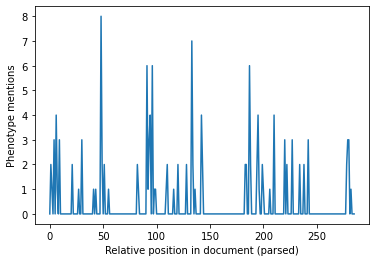

In [15]:
import matplotlib.pyplot as plt

plt.plot( [i* BIN_SIZE for i in range(len(d_phenotype[4])) ], list(d_phenotype[4]))
plt.ylabel('Phenotype mentions')
plt.xlabel('Relative position in document (parsed)')
plt.show()

## #3 Third Product: Phenotyping

### 3.1 Choose phenotyper:

In [114]:
phenotypers = ['clinphen', 'txt2hpo', 'ncr', 'scispacy']

pheno = phenotypers[0]
print(pheno)

clinphen


### 3.2 Extensive scan Case Study

In [103]:
#l_entities = ['V:6', 'V:7', 'V:8', 'III:4', 'III:9', 'III:10', 'III:11']
#new_soup

In [104]:
title

'Refractory_very_early-onset_inflammatory_bowel_dis'

In [115]:
import importlib as imp
import time
#imp.reload(func)

start = time.time()
print("Time elapsed on working...")

df_hpo, parsed_doc = func.phenotypeCaseStudy(new_soup, title, pheno=pheno, stringent=False) # pheno # , l_patterns=l_entities
df_hpo.head()

end = time.time()
print("Time consumed in working: ",end - start)

Time elapsed on working...
Iteration  0 / 133
Iteration  10 / 133
Iteration  20 / 133
Iteration  30 / 133
Iteration  40 / 133
Iteration  50 / 133
Iteration  60 / 133
Iteration  70 / 133
Iteration  80 / 133
Iteration  90 / 133
Iteration  100 / 133
Iteration  110 / 133
Iteration  120 / 133
Iteration  130 / 133
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients found in text!
No patients fou

In [118]:
pheno

'clinphen'

## Step 4: Annotations 
1. Recognize 'patient-id' column in table


### Create phenoprofiles based on table

In [117]:
import ast
import numpy as np
import importlib as imp
imp.reload(func)


df_pheno, d_pat = annotateCaseStudy(title, pheno=pheno, entity_linking=False)
df_pheno.head()


No patients found in text, thus we presume the case study concerns a single patient.
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems to represent a patient identifier
No column seems

,HP:0001511,HP:0001319,HP:0002329,HP:0012393,HP:0011010,HP:0025085,HP:0003128,HP:0002240,HP:0001290,HP:0001263,...,HP:0012115,HP:0002583,HP:0001399,HP:0001508,HP:0002014,HP:0001249,HP:0011451,HP:0001252,HP:0001298,HP:0004902
all,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Generate Performance Report

In [119]:
title

'Refractory_very_early-onset_inflammatory_bowel_dis'

In [49]:
#import sys 

#imp.reload(func)
func.write_HTML_report(title, phenotyper='Scraping')

# Validation

### Evaluate with validation set
#### Validation IARS

In [80]:
d_IARS_valid = {
    'Orenstein et al, 2016' : ['validation/021020_1757_HPODP_proj7_art93_pat68-export.html'],
    'Fagbemi et al, 2020' : ['validation/021020_1757_HPODP_proj7_art113_pat67-export.html'], 
    'Kopajtich et al, 2016' : ['validation/021020_1758_HPODP_proj7_art92_pat69-export.html',
        'validation/021020_1758_HPODP_proj7_art92_pat70-export.html',
        'validation/021020_1758_HPODP_proj7_art92_pat71-export.html'],
    'Musante et al, 2017' : ['validation/021020_1758_HPODP_proj7_art103_pat72-export.html', 
                             'validation/021020_1758_HPODP_proj7_art103_pat73-export.html', 
                             'validation/021020_1758_HPODP_proj7_art103_pat74-export.html', 
                             'validation/021020_1758_HPODP_proj7_art103_pat75-export.html'],
}

### Interpret validation phenotypic profiles

In [112]:
from bs4 import BeautifulSoup

case_study = 'Fagbemi et al, 2020' #  'Fagbemi et al, 2020' 'Orenstein et al, 2016' 'Musante et al, 2017' 'Kopajtich et al, 2016'

columns = ['Patient', 'ix', 'HPO-id', 'Description', 'assoc genes']
df_valid = pd.DataFrame(columns=columns)

for file_name in d_IARS_valid[case_study]:
    
    with open(file_name, 'r') as f:
        contents = f.read()

        soup = BeautifulSoup(contents, 'lxml')

        tables = soup.findAll("table")

        cnt = 0
        for table in tables:
            if table.findParent("table") is None:
                cnt += 1
        ths = soup.find_all('td')
        pat_id = ths[4].text
        #pat_id = pat_id.split(' ')[0]
        df1 = func.parseTable(table)
        df1.columns = ['ix', 'HPO-id', 'Description', 'assoc genes']
        #print(df1)
        print('Patient ', pat_id, ' File Name', file_name)
        df1['Patient'] = [pat_id for i in range(len(df1))]
        #print(df1)
        df_valid = pd.concat([df_valid, df1])

## Ignore entity linking for now!! 
df_valid['Patient'] = df_valid['Patient'].apply(lambda x : 'all')
df_valid.head()

Patient  Index patient (ID: 67)  File Name validation/021020_1757_HPODP_proj7_art113_pat67-export.html


,Patient,ix,HPO-id,Description,assoc genes
0,all,1,HP:0000152,Abnormality of head or neck,2727
1,all,2,HP:0000234,Abnormality of the head,2705
2,all,3,HP:0000929,Abnormality of the skull,1887
3,all,4,HP:0000240,Abnormality of skull size,1267
4,all,5,HP:0040195,Decreased head circumference,1026


### Matching - Tables

In [120]:
annotated_table = pd.read_csv("results/%s/3_annotations/PhenoProfiles_%s.csv" % (title, pheno), sep='|')
annotated_table.head()

,Unnamed: 0,HP:0001511,HP:0001319,HP:0002329,HP:0012393,HP:0011010,HP:0025085,HP:0003128,HP:0002240,HP:0001290,...,HP:0012115,HP:0002583,HP:0001399,HP:0001508,HP:0002014,HP:0001249,HP:0011451,HP:0001252,HP:0001298,HP:0004902
0,all,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


FN:  22
FP:  25
all 273 121
Confusion matrix, without normalization
[[57 22]
 [25  0]]
Sensitivity:	 0.72
Specificity:	 0.0
PPV:		 0.7
NPV:		 0.0
F1:		 0.71
Accuracy:	 0.55


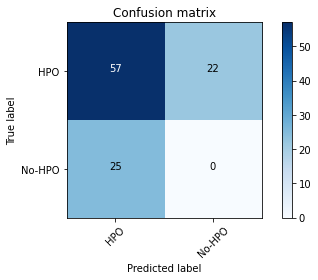

In [121]:
import networkx
import obonet
imp.reload(func)

url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

d_inferred = func.evaluateDictionaryHPO(annotated_table, graph)
cnf_matrix, d_tracker = func.evaluateDictionaryPatients(d_inferred, df_valid, graph)
TP, FP, TN, FN = cnf_matrix[0][0], cnf_matrix[1][0], cnf_matrix[1][1], cnf_matrix[0][1]

plt = func.print_confusion_matrix(cnf_matrix, classes=['HPO', 'No-HPO'], title='Confusion matrix')
func.print_perf(TP, FP, TN, FN)

### Save validation - performance - Error analysis

In [64]:
import obonet

url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

def savePerformanceToCSV(graph, title, pheno):
    df_tracker = pd.DataFrame.from_dict(d_tracker, orient='index').reset_index()
    df_tracker.columns = ['HPO', 'LBL']
    id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
    df_tracker['NAME'] = df_tracker['HPO'].apply(lambda x: id_to_name[x])
    
    ## add additional information
    df_append = pd.read_csv('results/%s/3_annotations/Overview_Intercepted_Phenotypes_%s.csv' % (title, pheno), sep='|')

    df_tracker = df_tracker.merge(df_append, left_on='HPO', right_on='hp_id', how='left')
    
    df_tracker.to_csv("results/%s/3_annotations/Validation_performance_%s.csv" % (title, pheno), sep='|', index=True)
    return df_tracker

df_tracker = savePerformanceToCSV(graph, title, pheno)
df_tracker.head()

,HPO,LBL,NAME,context,end,flags,hp_id,index,line,negated,pat_id,relevant,score,section,start
0,HP:0000077,TP,Abnormality of the kidney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HP:0000079,TP,Abnormality of the urinary system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HP:0000081,TP,Duplicated collecting system,Treatment with Ursodeoxycholic acid was initia...,40.0,set(),HP:0000081,67.0,There was a duplicated collecting system on th...,0.0,None,1.0,1.0,Case description,12.0
3,HP:0000119,TP,Abnormality of the genitourinary system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HP:0000126,TP,Hydronephrosis,Treatment with Ursodeoxycholic acid was initia...,86.0,set(),HP:0000126,67.0,There was a duplicated collecting system on th...,0.0,None,1.0,1.0,Case description,72.0


## Color Classification performance

Color False & True Positives to facilitate error analysis

In [65]:
# start, end, HPO
import Validation as val
imp.reload(val)

df_tracker = pd.read_csv("results/%s/3_annotations/Validation_performance_%s.csv" % (title, pheno), sep='|', index_col=0)
df_tracker = df_tracker.fillna('') 

val.annotate_text_validation(title, parsed_doc, df_tracker, pheno)



Elements found:  ['Main text', 'Captions']


## scispacy [OLD function]

In [94]:
import spacy
from scispacy import linking
from scispacy.linking import EntityLinker

pheno = 'scispacy'

if pheno == 'scispacy':
    nlp = spacy.load("en_core_sci_sm")

    hpo = linking.EntityLinker(resolve_abbreviations=True, name='hpo') # , name='hpo'

    nlp.add_pipe(hpo)
    
    hpo_to_umls, umls_to_hpo = func.HPO_to_UMLS(graph)
    
# inferred = func.scispacy_str(nlp, hpo, umls_to_hpo, lines)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Visualize overall results

In [30]:
import pandas as pd
data = {'Sens': [0.635, 0.69, 0.72], 'PPV': [0.5675, 0.5875, 0.6775], 'F1' : [0.5725, 0.6125, 0.6975]}

df = pd.DataFrame(data, index=['Clinphen', 'txt2hpo', 'NCR'])
#df = df.T
df

,Sens,PPV,F1
Clinphen,0.635,0.5675,0.5725
txt2hpo,0.690,0.5875,0.6125
NCR,0.720,0.6775,0.6975


In [33]:

list(df.T.keys())

['Clinphen', 'txt2hpo', 'NCR']

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<module 'matplotlib.pyplot' from 'C:\\Users\\levrex\\Anaconda3\\envs\\my_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

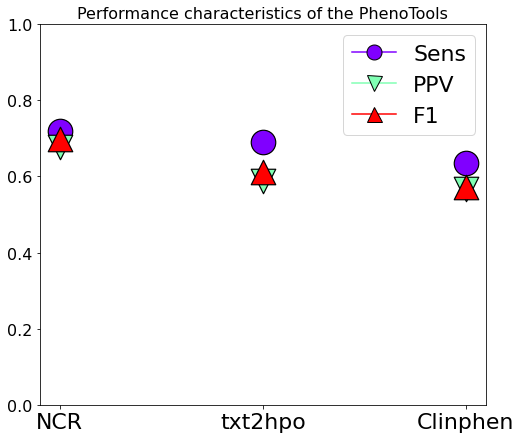

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

def performancePlot(df, title):
    """
    Params:
        df = dataframe where the different values per key are the 
            performance characteristics
        title = title of the plot
    """
    plt.figure(figsize=(8, 7))
    colors = cm.rainbow(np.linspace(0, 1, 3))
    markers = ['o', 'v', '^', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    for xe, ye in zip(list(df.keys()),list(df.values)[::-1]):
        ix = 0
        for i in ye:
            plt.scatter(xe, i, marker=markers[ix], s=600, edgecolors='black', linewidths=1.2, color=colors[ix])
            ix += 1
    
    legend_elements = [Line2D([0], [0], marker=markers[0], color=colors[0], label='Sens', markersize=15, markeredgecolor='black'),
                       Line2D([0], [0], marker=markers[1], color=colors[1], label='PPV', markersize=15, markeredgecolor='black'),
                       Line2D([0], [0], marker=markers[2], color=colors[2], label='F1', markersize=15, markeredgecolor='black')]       
    plt.legend(handles=legend_elements)      
    #plt.axhline(y=0)
    plt.yticks(fontsize=16)
    
    plt.axes().set_xticklabels(['NCR', 'txt2hpo', 'Clinphen']) 
    plt.ylim((0,1))
    plt.title(title, fontsize=16)
    return plt

performancePlot(df, 'Performance characteristics of the PhenoTools')